In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('startups_data_cleaned_step1.csv')

In [3]:
# General information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12306 entries, 0 to 12305
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12306 non-null  object 
 1   market                12306 non-null  object 
 2   funding_total_usd     12306 non-null  float64
 3   country_code          12306 non-null  object 
 4   state_code            12301 non-null  object 
 5   region                12306 non-null  object 
 6   city                  12291 non-null  object 
 7   funding_rounds        12306 non-null  int64  
 8   founded_at            12306 non-null  object 
 9   founded_month         12306 non-null  int64  
 10  founded_quarter       12306 non-null  int64  
 11  founded_year          12306 non-null  int64  
 12  first_funding_at      12306 non-null  object 
 13  last_funding_at       12306 non-null  object 
 14  seed                  12306 non-null  int64  
 15  venture            

In [5]:
# Check for null values
print(df.isnull().sum())

name                     0
market                   0
funding_total_usd        0
country_code             0
state_code               5
region                   0
city                    15
funding_rounds           0
founded_at               0
founded_month            0
founded_quarter          0
founded_year             0
first_funding_at         0
last_funding_at          0
seed                     0
venture                  0
equity_crowdfunding      0
undisclosed              0
convertible_note         0
debt_financing           0
angel                    0
grant                    0
private_equity           0
post_ipo_equity          0
post_ipo_debt            0
secondary_market         0
product_crowdfunding     0
round_A                  0
round_B                  0
round_C                  0
round_D                  0
round_E                  0
round_F                  0
round_G                  0
round_H                  0
category_count           0
clean_name               0
i

In [7]:
#Convert the date columns to datetime
df['founded_at'] = pd.to_datetime(df['founded_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/102233434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_operating', data=df, palette='Set2')


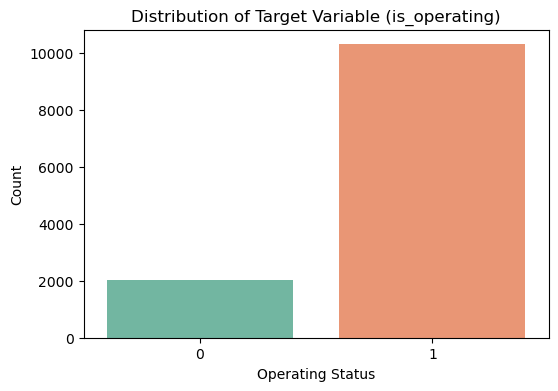

In [10]:
# 2. Distribution of the target variable (`is_operating`)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_operating', data=df, palette='Set2')
plt.title('Distribution of Target Variable (is_operating)')
plt.xlabel('Operating Status')
plt.ylabel('Count')
plt.show()

In [12]:
# 3. Overview of Numerical Features
#Exclude the month,year and quarter columns in the numerical columns as they are not continuous data
#Also drop the target variable
exclude_columns = ['founded_year', 'founded_quarter', 'founded_month','is_operating']
numerical_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_columns]

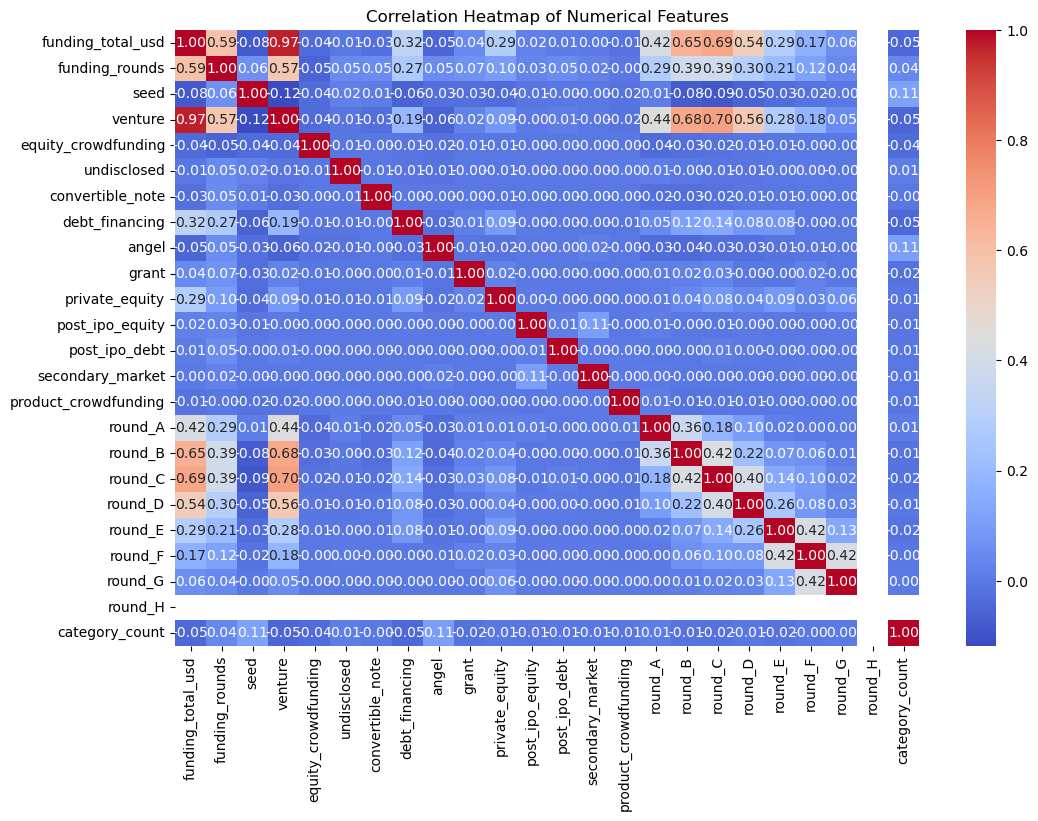

In [14]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

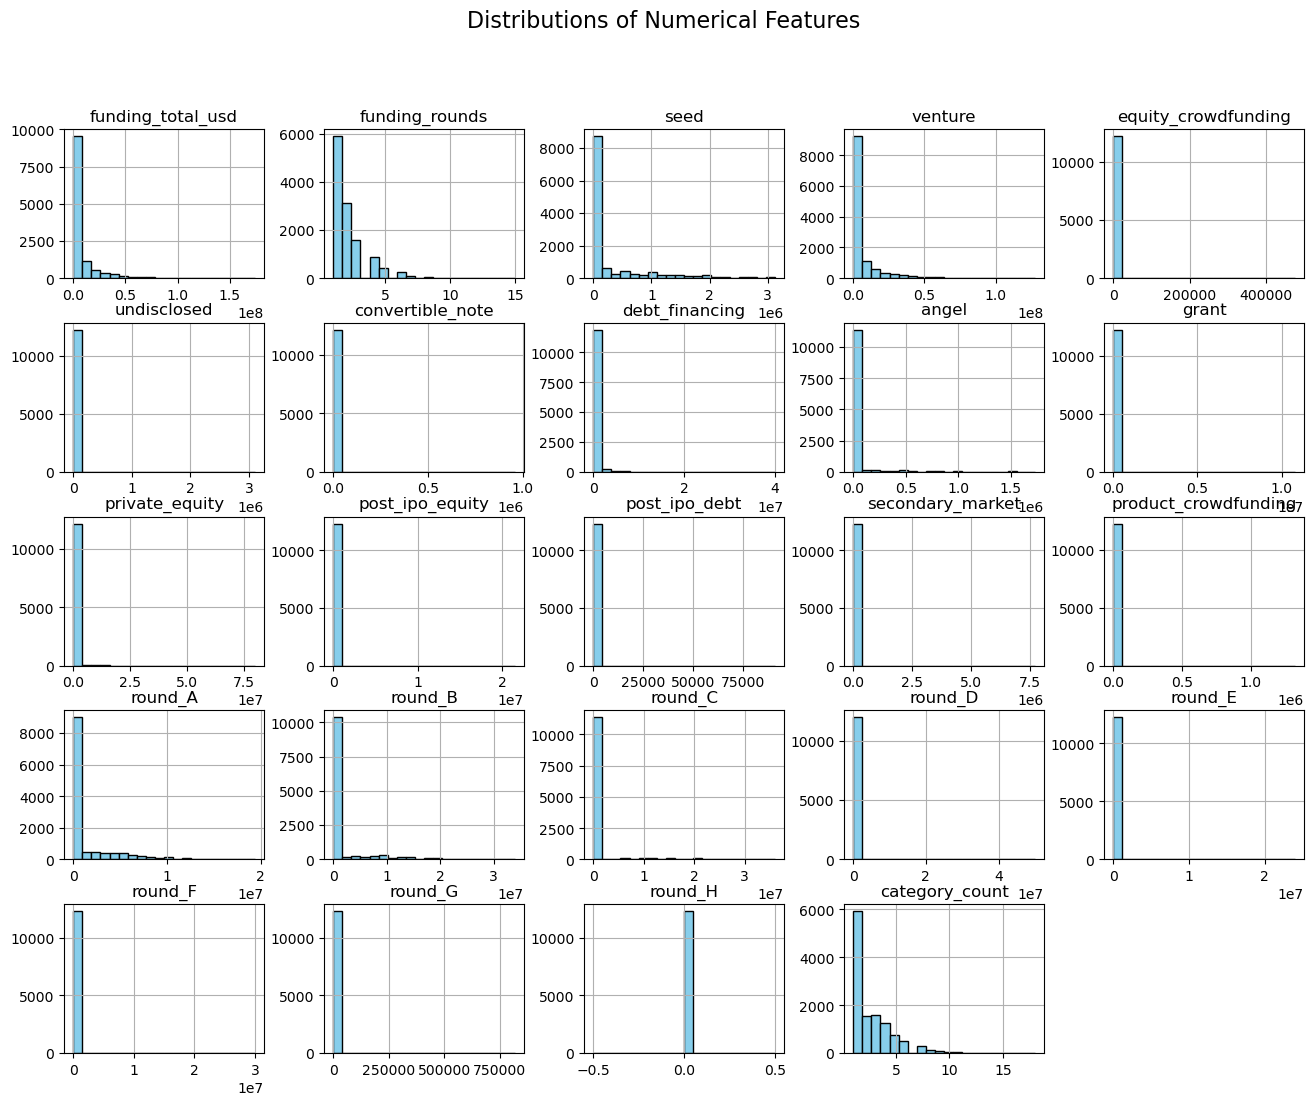

In [16]:
# Histograms for numerical features
df[numerical_cols].hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/724805128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set3')


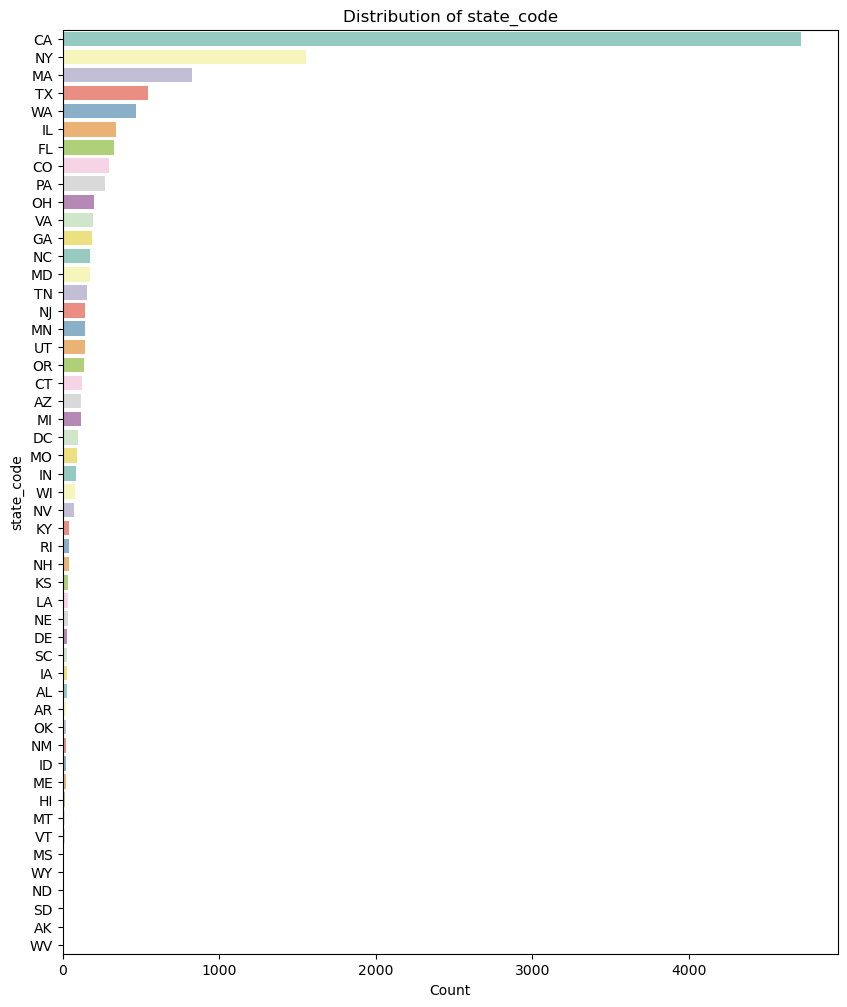

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/724805128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set3')


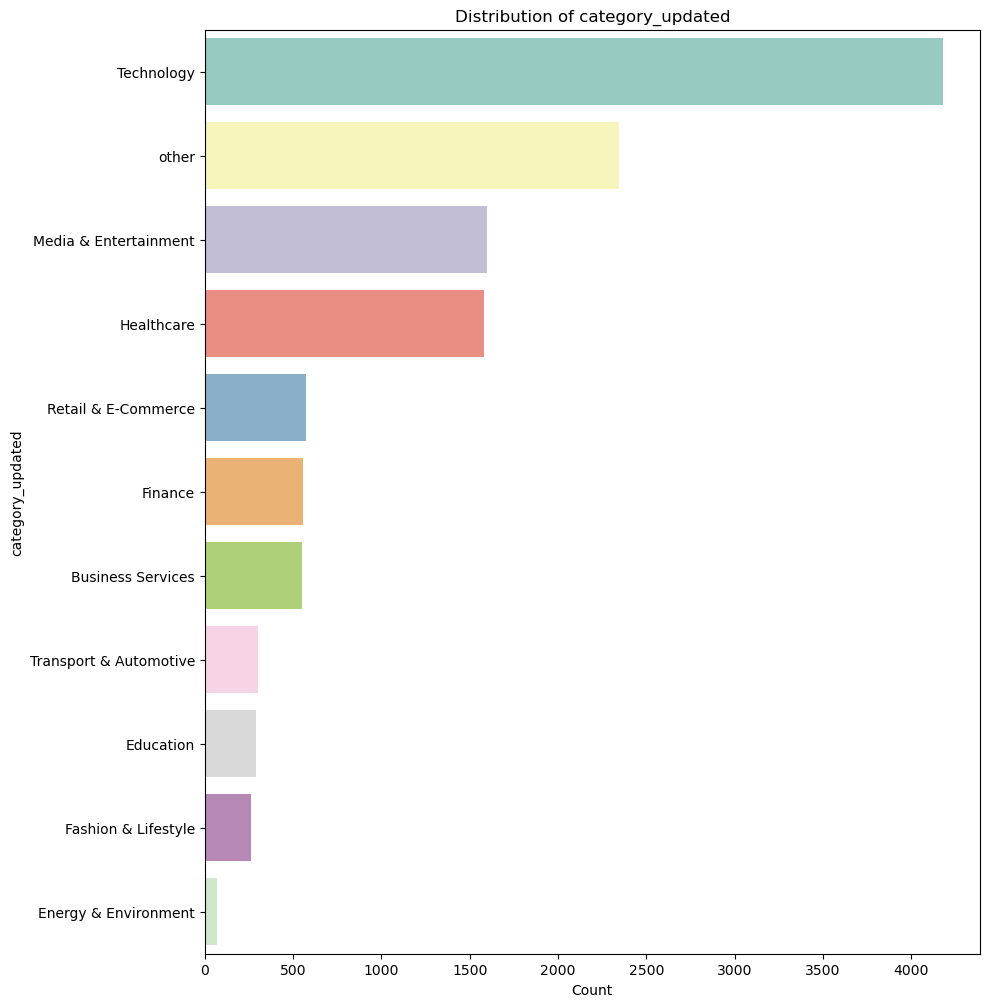

In [18]:
# 4. Categorical Features Overview
#Exclude the columsn like: name,cleaned_name,market and country_code
categorical_cols = ['state_code','category_updated']

for col in categorical_cols:
    plt.figure(figsize=(10, 12))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Set3')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/1477947634.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_operating', y='funding_total_usd', data=df, palette='Set1')


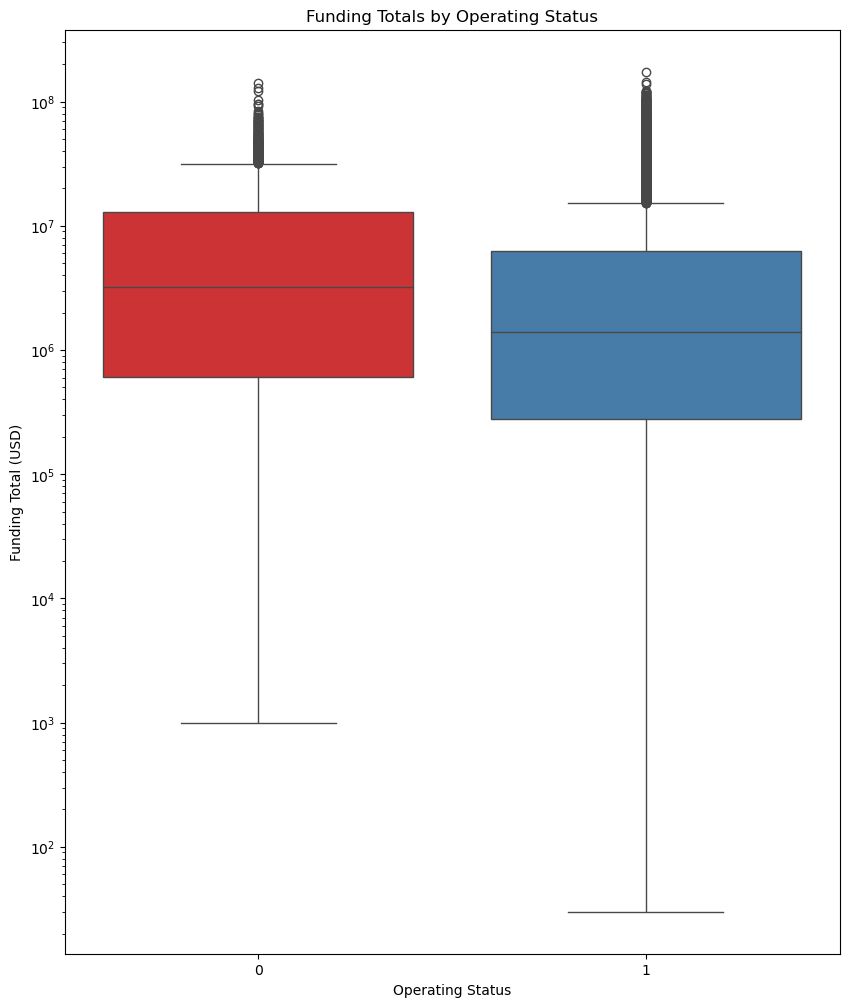

In [20]:
# 5. Relationship Between Features and Target
# Funding totals grouped by operating status
plt.figure(figsize=(10, 12))
sns.boxplot(x='is_operating', y='funding_total_usd', data=df, palette='Set1')
plt.title('Funding Totals by Operating Status')
plt.yscale('log')  # Log scale to handle potential skewness
plt.xlabel('Operating Status')
plt.ylabel('Funding Total (USD)')
plt.show()

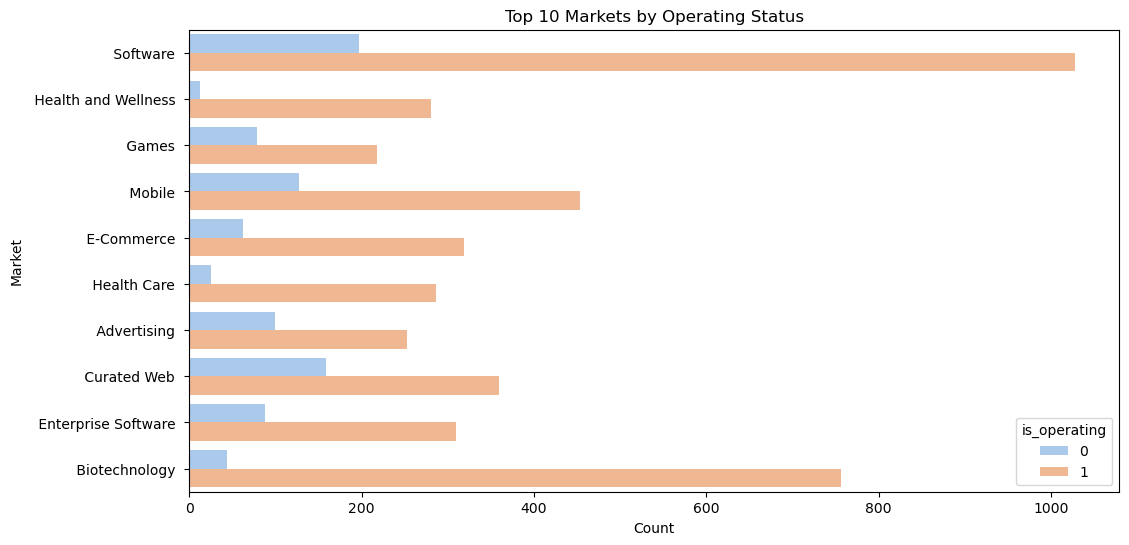

In [22]:
# Market distribution by operating status
plt.figure(figsize=(12, 6))
top_markets = df['market'].value_counts().head(10).index
sns.countplot(y='market', hue='is_operating', data=df[df['market'].isin(top_markets)], palette='pastel')
plt.title('Top 10 Markets by Operating Status')
plt.xlabel('Count')
plt.ylabel('Market')
plt.show()

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

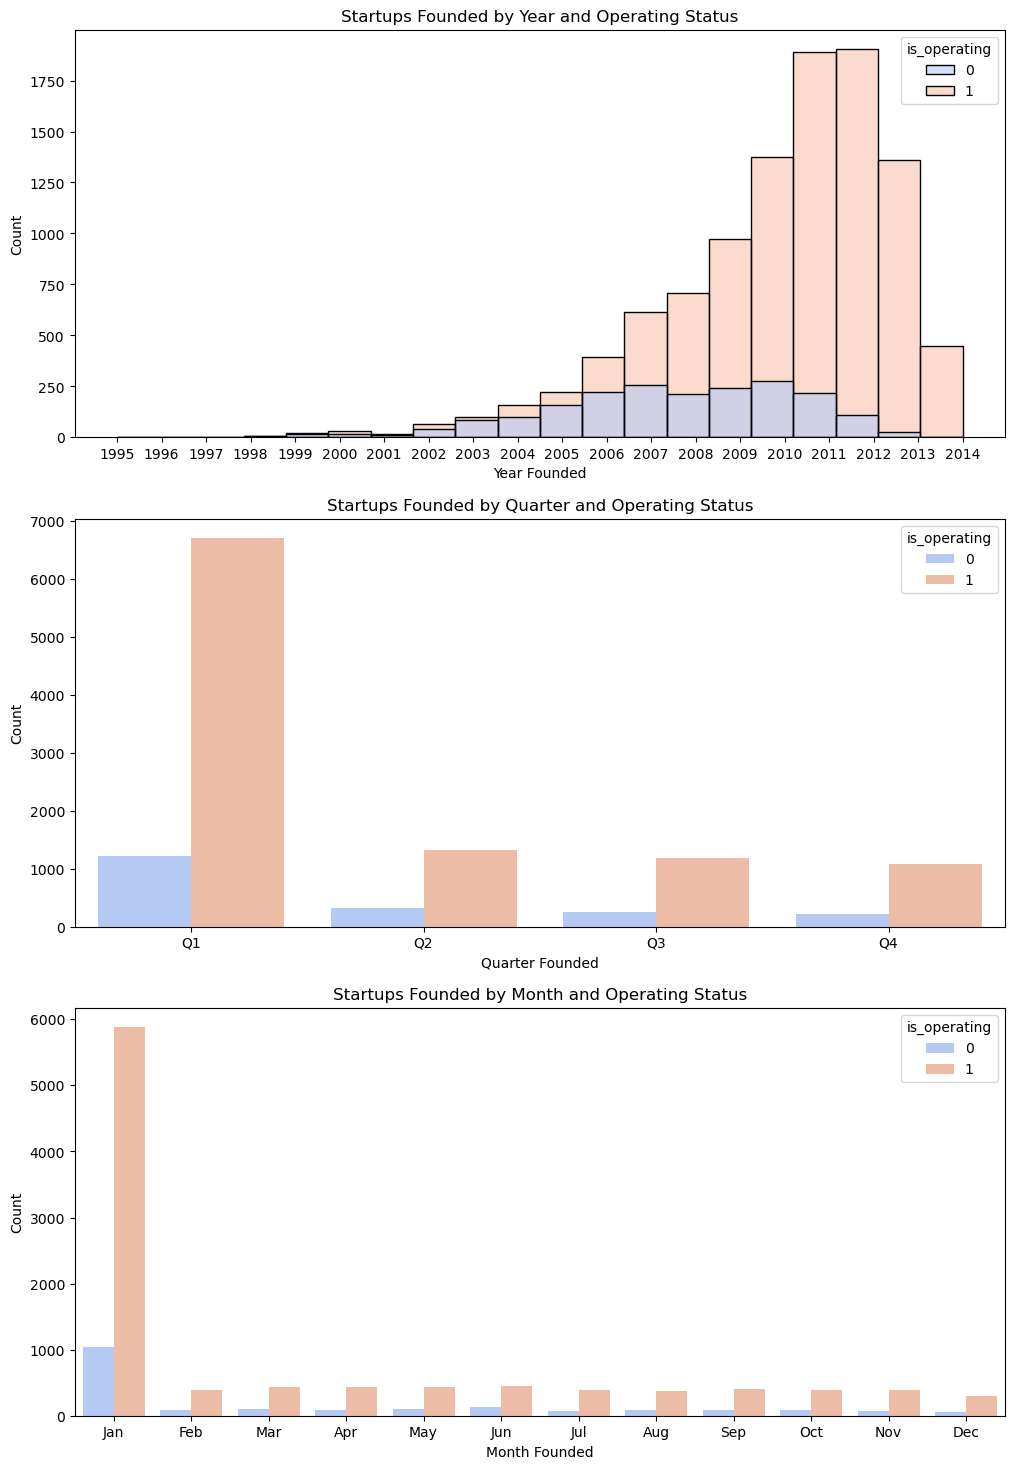

In [38]:
# Set up the figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 1. Trend by founded_year
sns.histplot(data=df, x='founded_year', hue='is_operating', kde=False, bins=20, palette='coolwarm', ax=axes[0])
axes[0].set_title('Startups Founded by Year and Operating Status')
axes[0].set_xticks(range(df['founded_year'].min(), df['founded_year'].max() + 1, 1))
axes[0].set_xlabel('Year Founded')
axes[0].set_ylabel('Count')

# 2. Trend by founded_quarter
sns.countplot(data=df, x='founded_quarter', hue='is_operating', palette='coolwarm', ax=axes[1])
axes[1].set_title('Startups Founded by Quarter and Operating Status')
axes[1].set_xlabel('Quarter Founded')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])  # Label the quarters

# 3. Trend by founded_month
sns.countplot(data=df, x='founded_month', hue='is_operating', palette='coolwarm', ax=axes[2])
axes[2].set_title('Startups Founded by Month and Operating Status')
axes[2].set_xlabel('Month Founded')
axes[2].set_ylabel('Count')
axes[2].set_xticks(range(0, 12))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/3263754401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='is_operating', y='funding_rounds', data=df, palette='viridis')


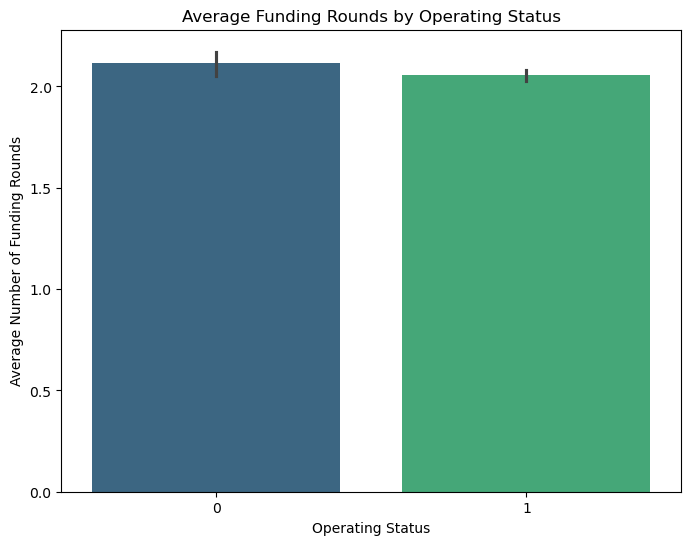

In [40]:
# 7. Funding Rounds and Operating Status
plt.figure(figsize=(8, 6))
sns.barplot(x='is_operating', y='funding_rounds', data=df, palette='viridis')
plt.title('Average Funding Rounds by Operating Status')
plt.xlabel('Operating Status')
plt.ylabel('Average Number of Funding Rounds')
plt.show()

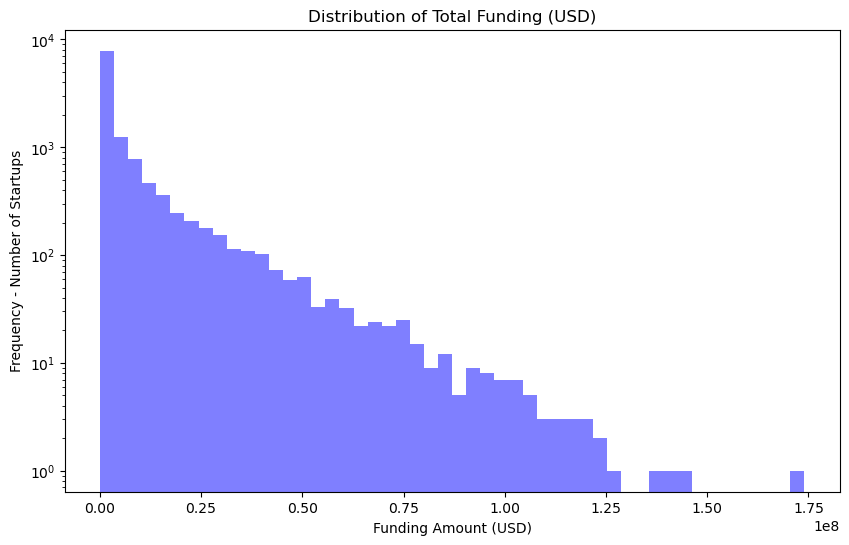

In [42]:
# Distirbution of total funding across the starups
plt.figure(figsize=(10, 6))
plt.hist(df['funding_total_usd'], bins=50, color='blue', alpha=0.5)  # Automatically calculates bin sizes
plt.title('Distribution of Total Funding (USD)')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency - Number of Startups')
plt.yscale('log')  # Use logarithmic scale for y-axis if there are outliers
plt.show()

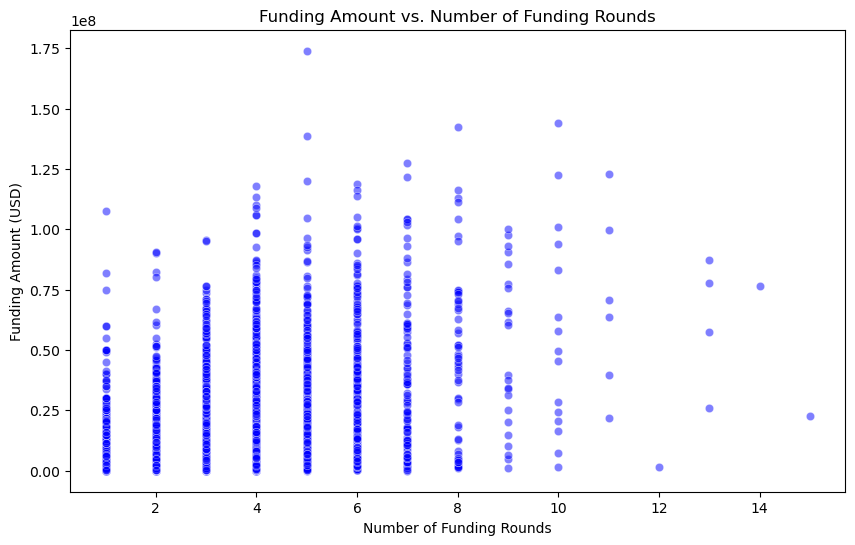

In [44]:
#Distribution of funding amount anf funding rounds across startups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='funding_rounds', y='funding_total_usd', data=df, color='blue', alpha=0.5)
plt.title('Funding Amount vs. Number of Funding Rounds')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Funding Amount (USD)')
plt.show()


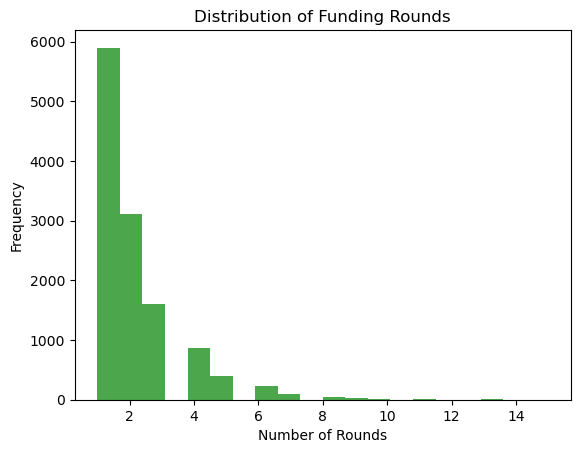

In [46]:
#Distribution of the funding rounds across all startups
plt.hist(df['funding_rounds'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Funding Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Frequency')
plt.show()

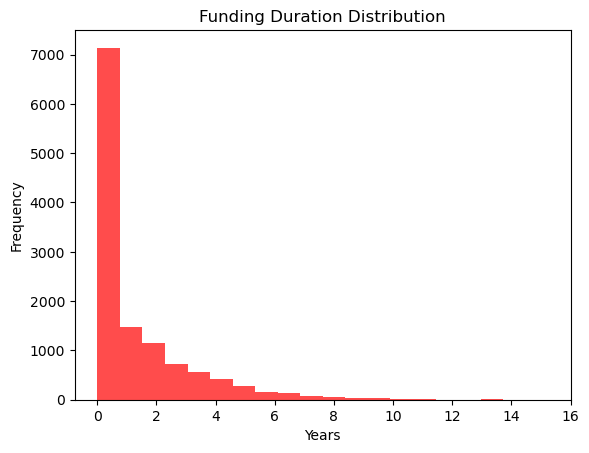

In [48]:
#Distribution of funding duration for the startups
# Calculate funding duration in years
df['funding_duration_years'] = (df['last_funding_at'] - df['first_funding_at']).dt.days / 365

# Plot the histogram
plt.hist(df['funding_duration_years'].dropna(), bins=20, color='red', alpha=0.7)
plt.title('Funding Duration Distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

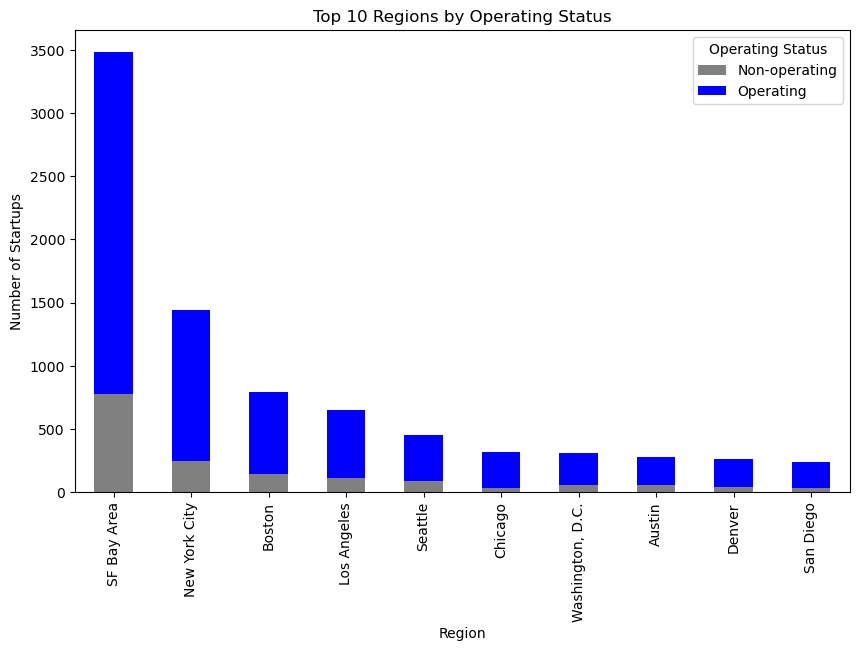

In [50]:
# Top 10 regions based on operating status
top_10_regions = df.groupby(['region', 'is_operating']).size().unstack().fillna(0)
top_10_regions = top_10_regions.sort_values(by=1, ascending=False).head(10)  # Limit to top 10 regions
top_10_regions.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'blue'])
plt.title('Top 10 Regions by Operating Status')
plt.xlabel('Region')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.legend(title='Operating Status', labels=['Non-operating', 'Operating'])
plt.show()

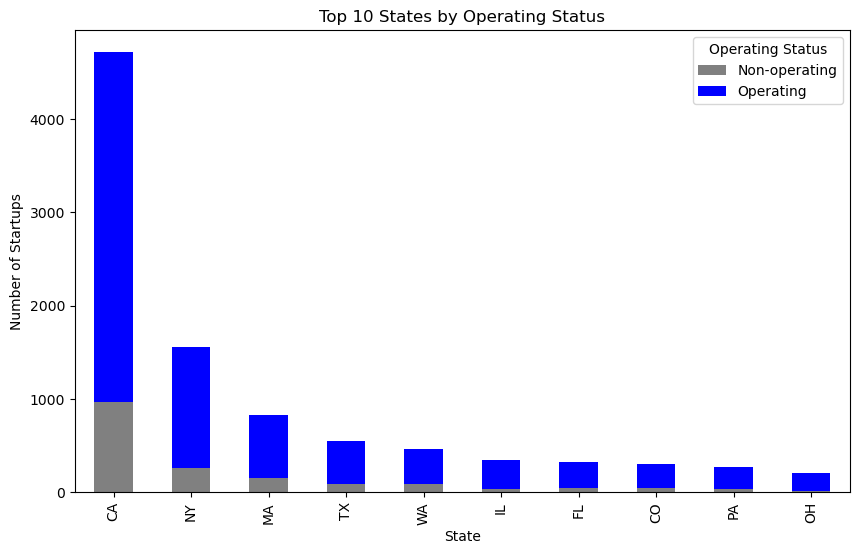

In [52]:
# Top 10 states based on operating status
top_10_states = df.groupby(['state_code', 'is_operating']).size().unstack().fillna(0)
top_10_states = top_10_states.sort_values(by=1, ascending=False).head(10)  # Limit to top 10 states
top_10_states.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gray', 'blue'])
plt.title('Top 10 States by Operating Status')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.legend(title='Operating Status', labels=['Non-operating', 'Operating'])
plt.show()

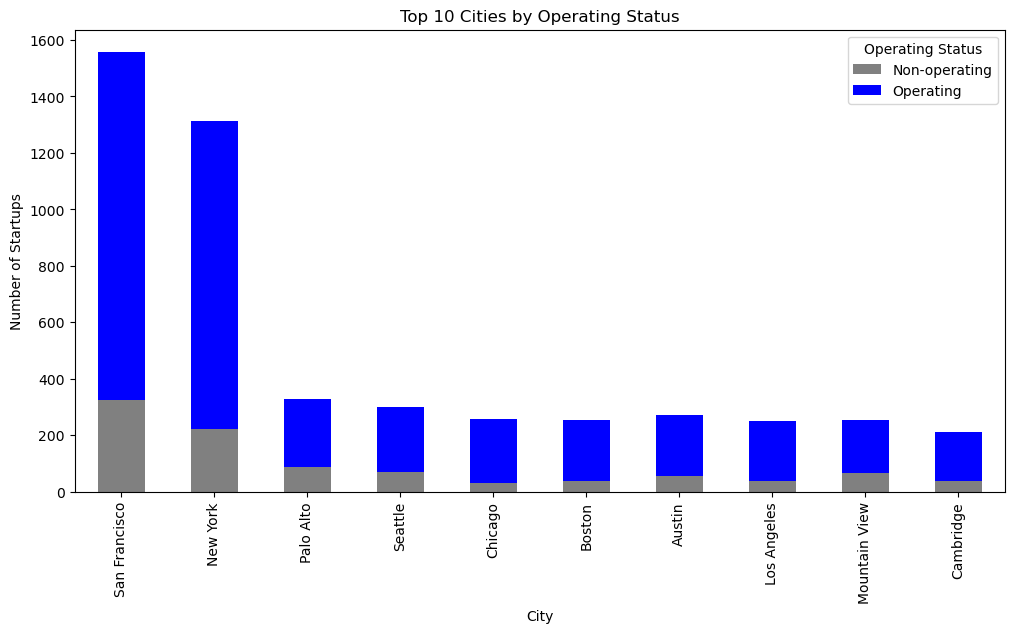

In [54]:
# Top 10 cities based on operating status
top_10_cities = df.groupby(['city', 'is_operating']).size().unstack().fillna(0)
top_10_cities = top_10_cities.sort_values(by=1, ascending=False).head(10)  # Limit to top 10 cities
top_10_cities.plot(kind='bar', stacked=True, figsize=(12, 6), color=['gray', 'blue'])
plt.title('Top 10 Cities by Operating Status')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=90)
plt.legend(title='Operating Status', labels=['Non-operating', 'Operating'])
plt.show()

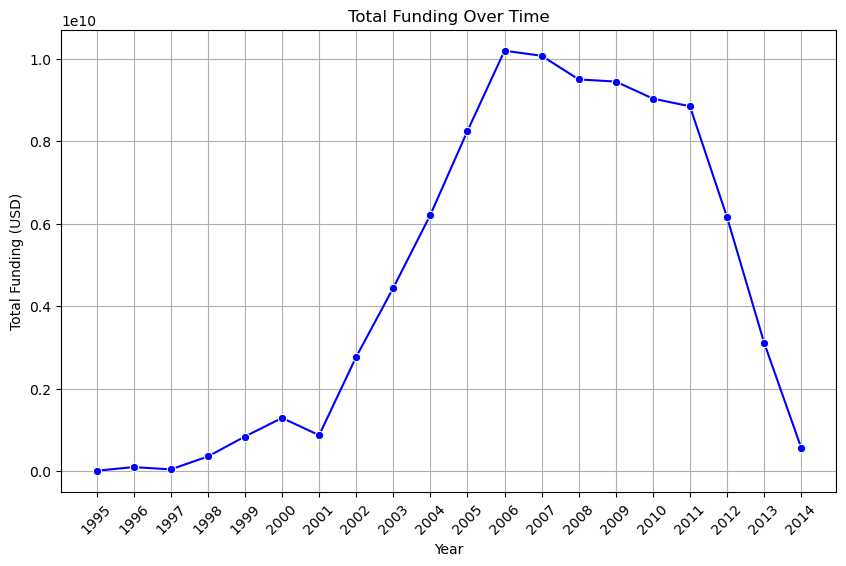

In [74]:
# Aggregating total funding by year
funding_by_year = df.groupby('founded_year')['funding_total_usd'].sum()

# Plotting total funding over time (by year)
plt.figure(figsize=(10, 6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, color='blue', marker='o')

# Set title and labels
plt.title('Total Funding Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')

# Set x-axis to show only integer years
plt.xticks(funding_by_year.index, rotation=45)

# Show grid and plot
plt.grid(True)
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/54606297.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_total_usd', y='category_updated', data=top_categories, palette='viridis')


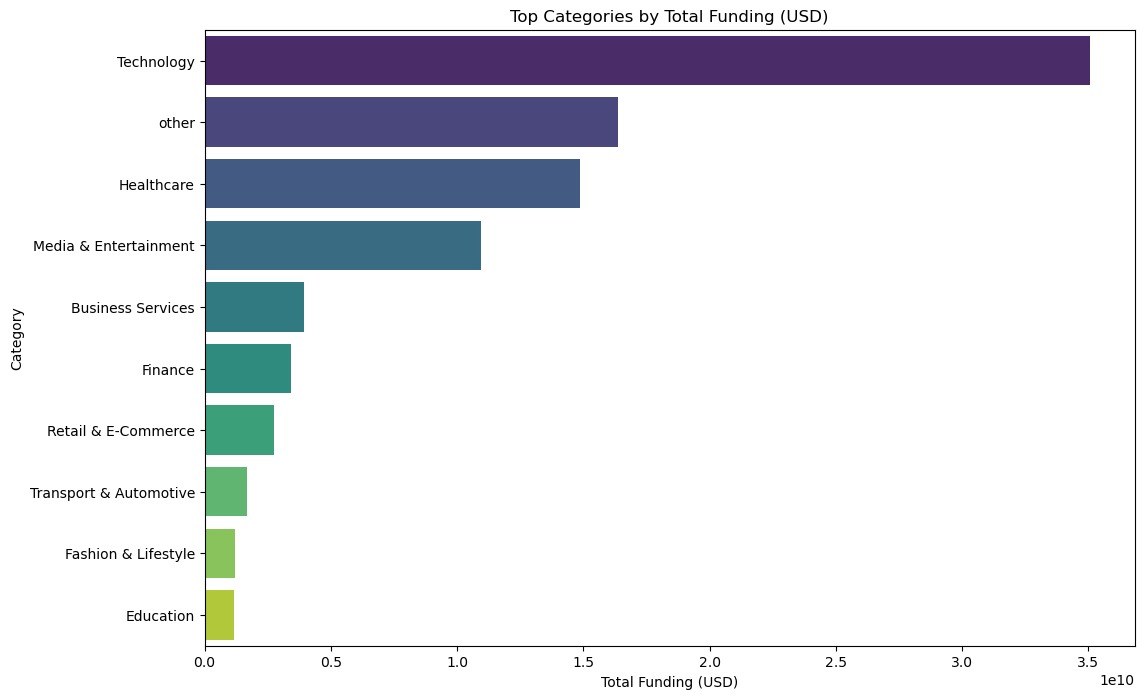

In [76]:
# Group by category_updated and sum the funding_total_usd
category_funding = df.groupby('category_updated')['funding_total_usd'].sum().reset_index()

# Sort the categories by total funding in descending order
category_funding_sorted = category_funding.sort_values(by='funding_total_usd', ascending=False)

# Get the top 10 categories by total funding
top_categories = category_funding_sorted.head(10)

# Plot the top 10 categories by total funding
plt.figure(figsize=(12, 8))
sns.barplot(x='funding_total_usd', y='category_updated', data=top_categories, palette='viridis')
plt.title('Top Categories by Total Funding (USD)')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Category')
plt.show()

/var/folders/cd/jz0sn5850b5ckqbp3mgr9xv00000gn/T/ipykernel_18862/463998870.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_total_usd', y='market', data=top_markets, palette='coolwarm')


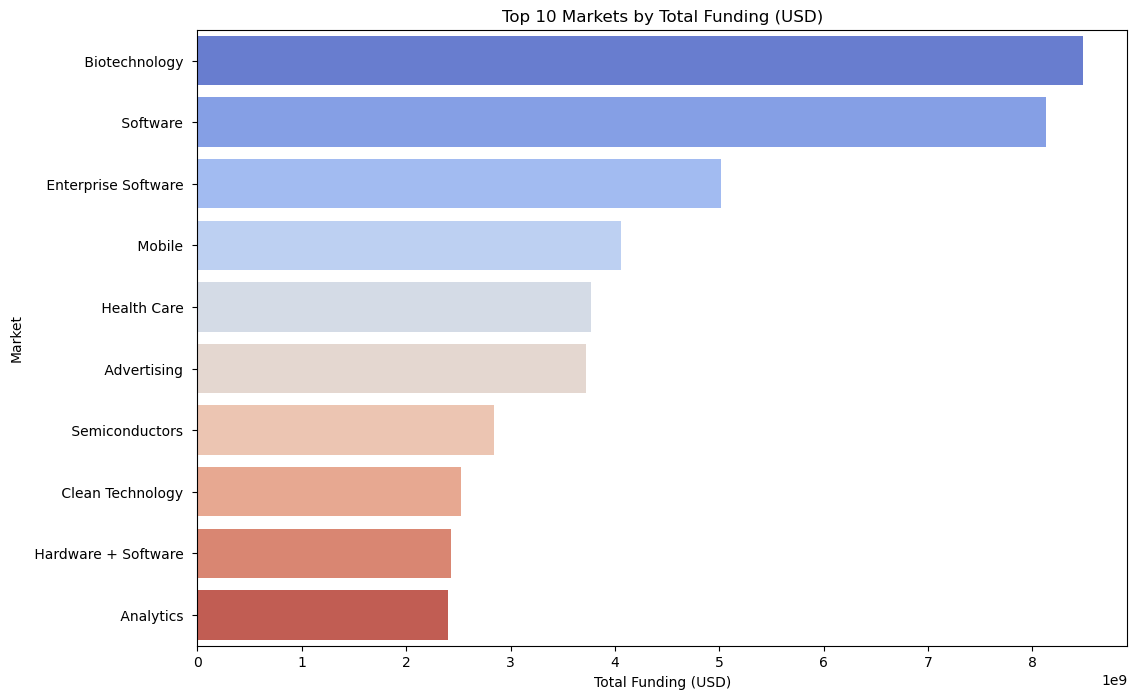

In [78]:
# Group by market and sum the funding_total_usd
market_funding = df.groupby('market')['funding_total_usd'].sum().reset_index()

# Sort the markets by total funding in descending order
market_funding_sorted = market_funding.sort_values(by='funding_total_usd', ascending=False)

# Get the top 10 markets by total funding
top_markets = market_funding_sorted.head(10)

# Plot the top 10 markets by total funding
plt.figure(figsize=(12, 8))
sns.barplot(x='funding_total_usd', y='market', data=top_markets, palette='coolwarm')
plt.title('Top 10 Markets by Total Funding (USD)')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Market')
plt.show()

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Group the data by 'founded_year' and 'category_updated', and count the startups' survival
category_year_status = df.groupby(['founded_year', 'category_updated', 'is_operating']).size().reset_index(name='startup_count')

# Pivot the data to separate operating and non-operating startups for each category
category_year_status_pivot = category_year_status.pivot_table(index=['founded_year', 'category_updated'],
                                                             columns='is_operating',
                                                             values='startup_count',
                                                             aggfunc='sum',
                                                             fill_value=0)

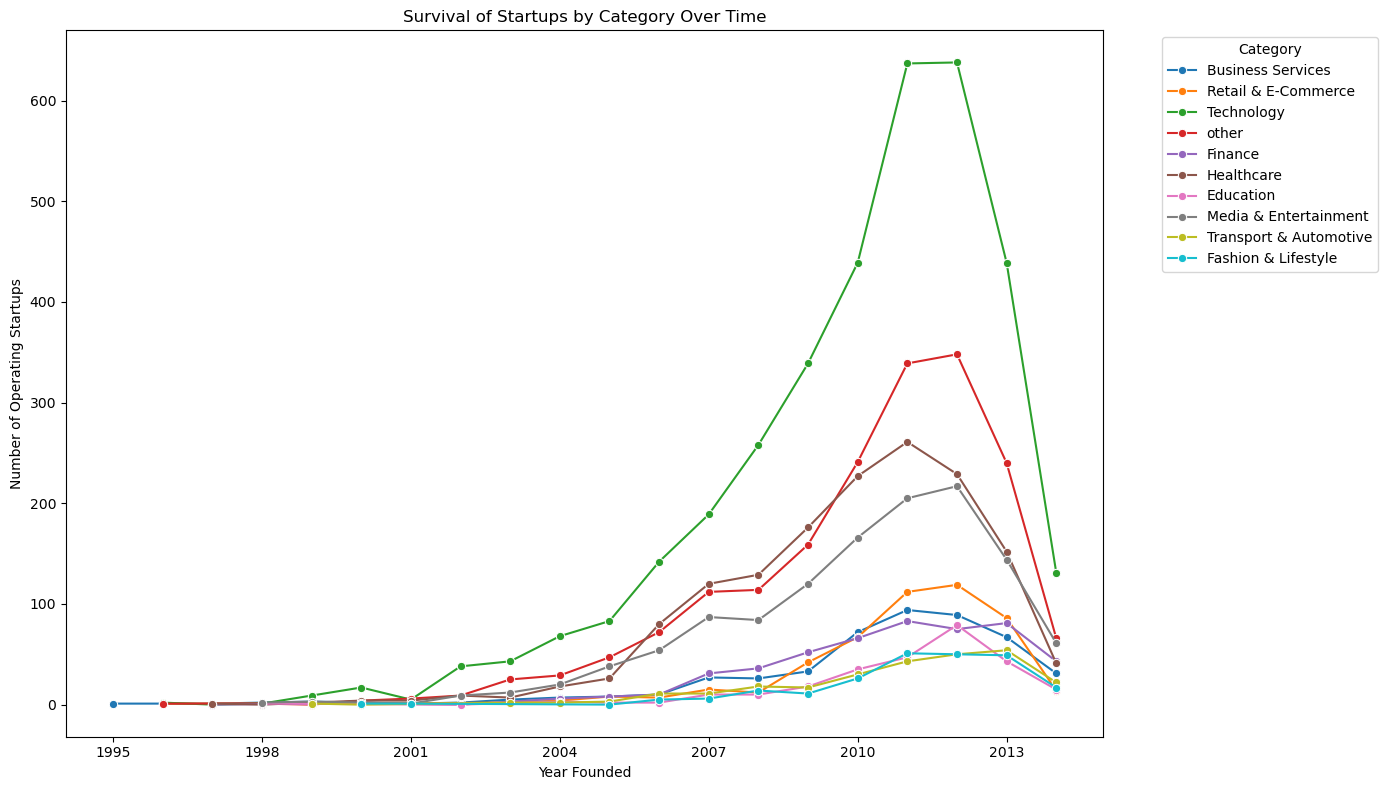

In [88]:
# Rename the columns for easier understanding
category_year_status_pivot.columns = ['Non-Operating', 'Operating']

# Reset the index for plotting
category_year_status_pivot.reset_index(inplace=True)

plt.figure(figsize=(14, 8))

# Filter top categories for better readability (optional)
top_categories = category_year_status['category_updated'].value_counts().head(10).index
filtered_data = category_year_status_pivot[category_year_status_pivot['category_updated'].isin(top_categories)]

# Plot the evolution over time (by category)
sns.lineplot(data=filtered_data, x='founded_year', y='Operating', hue='category_updated', marker='o')

# Set the title and labels
plt.title('Survival of Startups by Category Over Time')
plt.xlabel('Year Founded')
plt.ylabel('Number of Operating Startups')

# Customizing x-axis ticks to show only whole years
plt.xticks(ticks=range(filtered_data['founded_year'].min(), filtered_data['founded_year'].max() + 1))

# Optional: Set the major ticks to be integers on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust legend and layout
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

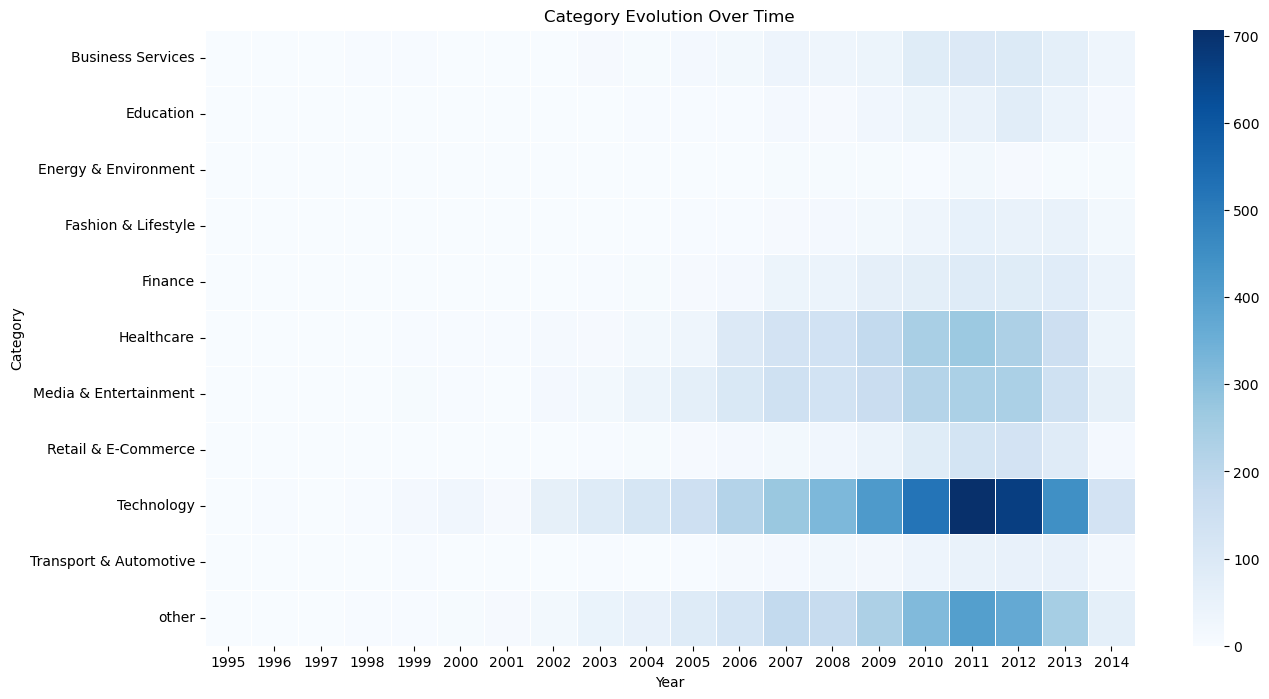

In [90]:
#Category evolution over time
# Group and pivot the data to count startups by category and year
try:
    category_evolution = df.groupby(['founded_year', 'category_updated']).size().unstack(fill_value=0)
except KeyError as e:
    print(f"Column not found: {e}")
    category_evolution = pd.DataFrame()  # To avoid breaking in case of missing columns

# Plot the heatmap if data is available
if not category_evolution.empty:
    # Plotting the heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(category_evolution.T, cmap="Blues", cbar=True, linewidths=0.5)

    # Add plot details
    plt.title("Category Evolution Over Time")
    plt.xlabel("Year")
    plt.ylabel("Category")
    plt.show()
else:
    print("The heatmap data is empty. Please check the input DataFrame.")